In [ ]:
import code_cesar as cc

# Chiffrement de Vigénère

Le code de Vigénère part du meme principe que le code de César, sauf qu'au lieu d'utiliser la meme clé de décalage pour tout le message à crypter on chiffre par bloc. On procède comme suivant : 

* On fixe une longueur de bloc $m$.
* on choisit une clé de taille $m$, exemple $[n_1, n_2, \cdots n_m]$
* On découpe le message en blocs de taille $m$
* pour chaque bloc on chiffre de la façon suivante : 1ère lettre avec chiffrement de César de clé $n_1$, 2ème lettre avec chiffrement de César de clé $n_2$ ...

In [ ]:
#Completer "texte" par des "X" pour que la taille de "texte" soit divisible par m
def Complete_texte(texte,m):
    l=len(texte)
    a=l%m
    k=0
    while a != 0 :
        l+=1
        k+=1
        a=l%m
    if k!=0:
        for i in range(k):
            texte+="X" 
    return texte

#La table de multiplication de m par les d premiers entiers-------------------
def table_mult(m,d):
    table=[]
    for i in range(d):
        table.append(m*i)
    return table

#Créer une liste de meme taille que chaine qui contient des X----------------
def create_liste(chaine):
    liste=[]
    l=len(chaine)
    for i in range(l):
        liste.append("x")
    return liste

#--------------------------------------------------------------------------
# message : le texte qu'on veut crypter
# cle : liste de longueur "taille" qui indique la clé de décalage pour chaque
# bloque (il y a "taille" blocs)

alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def code_vigenere_cryp(message,cle,taille):
    #on veut que la taille du message soit divisible par le nombre de blocs 
    texte=Complete_texte(message,taille)
    l=len(texte)
    d=int(l/taille)
    table=table_mult(taille,d)
    code=create_liste(texte)
    for j in range(taille) : 
        for i in table: 
            k=0 
            s=j+i
            while(k<26 and texte[s]!=alphabet[k]): 
                k+=1
            p=(k+cle[j])%26 
            code[s]=alphabet[p]
    code="".join(code)
    return code 
#-------------------------------------------------------------------------

In [ ]:
c="CESYSTEMEDECODAGENESTPASSURMAISPLUSQUELECODEDECESARSILACLEESTLONGUE"
e=[3, 14, 7, 22, 19]
print(code_vigenere_cryp(c,e,5))

FSZULWSTAWHQVZTJSUALWDHOLXFTWBVDSQLTILHXFCKAWHQLOTUGPHTFZLALWZVJZXSETQ


Pour décrypter un message crypté avec un chiffrement de Vigénère, sachant qu'on connait la clé, on garde pratiquement la meme fonction code_vigenere_cryp sauf qu'il faut remplacer *p=(k+cle[j])%26* par *p=(k-cle[j])%26*.

In [ ]:
 #message : le texte qu'on veut décrypter

def code_vigenere_decr(message,cle,taille):
    l=len(message)
    d=int(l/taille)
    table=table_mult(taille,d)
    code=create_liste(message) 
    for j in range(taille) : 
        for i in table: 
            k=0 
            s=j+i
            while(k<26 and message[s]!=alphabet[k]): 
                k+=1
            p=(k-cle[j])%26 
            code[s]=alphabet[p]
    code="".join(code)
    return code

In [ ]:
t='FSZULWSTAWHQVZTJSUALWDHOLXFTWBVDSQLTILHXFCKAWHQLOTUGPHTFZLALWZVJZXSETQ'
e=[3, 14, 7, 22, 19]
print(code_vigenere_dec(t,e,5))

CESYSTEMEDECODAGENESTPASSURMAISPLUSQUELECODEDECESARSILACLEESTLONGUEXXX


CE SYSTEME DE CODAGE NEST PAS SUR MAIS PLUS QUE LE CODE DE CESAR SI LA CLE EST LONGUE XXX


# Cryptanalyse des codes de Vigenère.

OSFFBDWCJFDAPSGSYWJSQSUSQSVHSZXGFCQGLRHFHRHBRGMCXFVQRAPSXBSFRHRQRZHGXF

Supposant maintenant qu'on veut décoder le message ci-dessus sachant qu’il a été crypté avec un code de Vigenère d’une clé de longueur 2. Pour cela on procède comme suivant :

a) Subdiviser le message en block de taille 2

OS FF BD WC JF DA PS GS YW JS QS US QS VH SZ XG FC QG LR HF HR HB RG MC XF VQ RA PS XB SF RH RQ RZ HG XF

b) Regrouper les lettres qui sont codées avec le même chiffrement de César :

Dans notre cas on a deux sous codes (puisqu’on a une clé de longueur 2)

* code1="OFBWJDPGYJQUQVSXFQLHHHRMXVRPXSRRRHX"
* code2="SFDCFASSWSSSSHZGCGRFRBGCFQASBFHQZGF"

c) Analyse de fréquences

Code1 et code2 sont cryptés avec un chiffrement de César d’une clé inconnue, pour les décrypter on utilisera alors l’analyse de fréquence.
A l’aide de notre fonction *affiche_stat(code)* du fichier code_cesar.py, on va afficher les statistiques d’occurrence des lettres dans les deux sous codes.

Statistiques d'occurence de code1


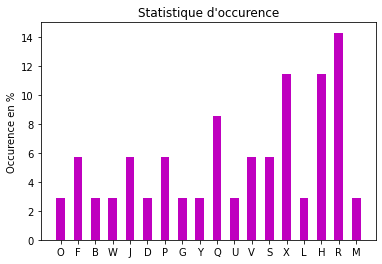

In [ ]:
code1="OFBWJDPGYJQUQVSXFQLHHHRMXVRPXSRRRHX"
code2="SFDCFASSWSSSSHZGCGRFRBGCFQASBFHQZGF"

print('Statistiques d\'occurence de code1' )
cc.affiche_stat(code1)

Pour code1 on constate que les lettres R, H et X sont les plus fréquentes, on peut donc supposer que la lettre E (la lettre la plus fréquente dans un texte français) est remplacée par R, H ou X.

Statistiques d'occurence de code2


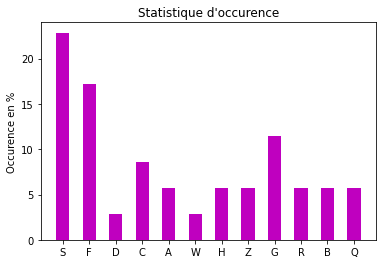

In [ ]:
print('Statistiques d\'occurence de code2' )
cc.affiche_stat(code2)

Pour code2 on constate que les lettres S et F sont susceptibles d’être la lettre E, d’après le graphique ci-dessus.

La première lettre de code2 est S et elle est la deuxième lettre du message crypté, c’est donc fort probable que ça soit une voyelle, et donc la lettre E dans le message clair.

En prenant S comme le crypté de E dans code2, on suppose ainsi que la clé utilisée est 14. En utilisant la fonction *code_cesar*, je trouve comme texte clair : ‘‘ERPORMEEIEEEETLSOSDRDNSORCMENRTCLSR’’


In [ ]:
print(cc.decrypt_cesar(code2,14))

ERPORMEEIEEEETLSOSDRDNSORCMENRTCLSR


Dans code1 si on prend R comme le crypté de E, c à d un code de César de clé 13, le rendu, en considérant le décrypté de code2, n’est pas vraiment lisible. Par contre en prenant H comme le crypté de E, donc un chiffrement de César de clé 3, on a le résultat suivant : 

‘‘LCYTGAMDVGNRNSPUCNIEEEOJUSOMUPOOOEU’’.


In [ ]:
print(cc.decrypt_cesar(code1,3))

LCYTGAMDVGNRNSPUCNIEEEOJUSOMUPOOOEU


Le décrypté final est :

* Décrypté de code1 : LCYTGAMDVGNRNSPUCNIEEEOJUSOMUPOOOEU
* Décrypté de code1 : ERPORMEEIEEEETLSOSDRDNSORCMENRTCLSR

En lisant colonne par colonne on trouve le message clair suivant :

‘‘LE CRYRTOGRAMME DE VIGENERE NEST PLUS CONSIDERE DE NOS JOURS COMME UN PROTOCOLE SUR’’